# Importando bibliotecas e extraindo o dataset

In [1]:
# Imports das libs
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_ind, wilcoxon
from scipy.stats import levene, bartlett
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando o dataset da lib statsmodels
nile_data = sm.datasets.nile.load_pandas()

# Extraindo os dados para um dataframe pandas
df = nile_data.data
df.head()

,year,volume
0,1871.0,1120.0
1,1872.0,1160.0
2,1873.0,963.0
3,1874.0,1210.0
4,1875.0,1160.0


In [3]:
df.shape

(100, 2)

In [4]:
df.isnull().sum()

year      0
volume    0
dtype: int64

# Pré-Processamento dos dados

In [5]:
# Retornado o primeiro ano registrado no dataset
df['year'].min()

1871.0

In [6]:
# Retornando o último ano no dataset
df['year'].max()

1970.0

In [7]:
# Convertendo a coluna 'year' de float para int
df['year'] = df['year'].astype(int)

In [8]:
# Dividindo os dados com base no ano da construção da represa, 1898:
antes_represa = df[df['year'] < 1898]  # Antes da represa
depois_represa = df[df['year'] >= 1898]  # Depois da represa

print("Período antes da represa:", antes_represa)
print("Período depois da represa:", depois_represa)

Período antes da represa:     year  volume
0   1871  1120.0
1   1872  1160.0
2   1873   963.0
3   1874  1210.0
4   1875  1160.0
5   1876  1160.0
6   1877   813.0
7   1878  1230.0
8   1879  1370.0
9   1880  1140.0
10  1881   995.0
11  1882   935.0
12  1883  1110.0
13  1884   994.0
14  1885  1020.0
15  1886   960.0
16  1887  1180.0
17  1888   799.0
18  1889   958.0
19  1890  1140.0
20  1891  1100.0
21  1892  1210.0
22  1893  1150.0
23  1894  1250.0
24  1895  1260.0
25  1896  1220.0
26  1897  1030.0
Período depois da represa:     year  volume
27  1898  1100.0
28  1899   774.0
29  1900   840.0
30  1901   874.0
31  1902   694.0
..   ...     ...
95  1966   746.0
96  1967   919.0
97  1968   718.0
98  1969   714.0
99  1970   740.0

[73 rows x 2 columns]


# Análise exploratória

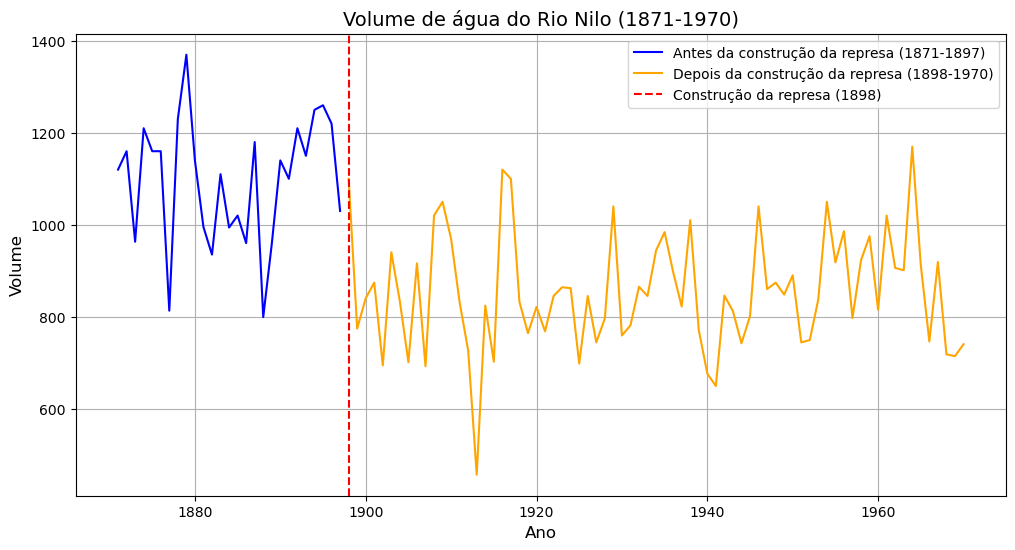

In [9]:
# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(antes_represa['year'], antes_represa['volume'], label='Antes da construção da represa (1871-1897)', color='blue')
plt.plot(depois_represa['year'], depois_represa['volume'], label='Depois da construção da represa (1898-1970)', color='orange')
plt.axvline(x=1898, color='red', linestyle='--', label='Construção da represa (1898)')
plt.title('Volume de água do Rio Nilo (1871-1970)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [10]:
# Comparando as médias de volume do rio (antes e depois da construção da repressa)

# Utilizxando Wilcoxon pois os dados não apresentam uma distribuição normal
stat, p_value = wilcoxon(antes_represa['volume'], depois_represa['volume'][:len(antes_represa)])
print(f"Wilcoxon Test: stat={stat:.2f}, p-value={p_value:.4f}")

Wilcoxon Test: stat=19.50, p-value=0.0000


Como o valor p é menor que 0.05, rejeitamos a hipótese nula. 
Conclusão: Existe uma diferença significativa entre o fluxo do Rio Nilo antes e depois da construção da represa.



# Criando o modelo com ARIMA

In [11]:
# Modelo ARIMA para antes da represa
modelo_antes_construcao = ARIMA(antes_represa['volume'], order=(1, 1, 1))  # (p, d, q)
modelo_antes_construcao_fit = modelo_antes_construcao.fit()

# Modelo ARIMA para depois da represa
modelo_depois_construcao = ARIMA(depois_represa['volume'], order=(1, 1, 1))  # (p, d, q)
modelo_depois_construcao_fit = modelo_depois_construcao.fit()

# Resumo dos modelos
print("Resumo do Modelo ARIMA - Antes da Represa:")
print(modelo_antes_construcao_fit.summary())

print("\nResumo do Modelo ARIMA - Depois da Represa:")
print(modelo_depois_construcao_fit.summary())

Resumo do Modelo ARIMA - Antes da Represa:
                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -166.222
Date:                Thu, 21 Nov 2024   AIC                            338.444
Time:                        15:21:44   BIC                            342.218
Sample:                             0   HQIC                           339.530
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1580      0.235      0.674      0.500      -0.302       0.618
ma.L1         -0.9998     70.494     -0.014      0.989    -139.165     137.166
sigma2   

Realizando a previsão do volume da água do Rio Nilo para os próximos 5 anos, antes e depois da construção da repressa.

In [12]:
# Previsão para os próximos 5 anos (exemplo)
previsao_antes_represa = modelo_antes_construcao_fit.forecast(steps=5)
previsao_depois_represa = modelo_depois_construcao_fit.forecast(steps=5)

# Exibindo as previsões
print("Previsões - Antes da Represa:")
print(previsao_antes_represa)
print("\nPrevisões - Depois da Represa:")
print(previsao_depois_represa)

Previsões - Antes da Represa:
27    1085.975976
28    1094.821099
29    1096.218773
30    1096.439629
31    1096.474527
Name: predicted_mean, dtype: float64

Previsões - Depois da Represa:
73    833.853015
74    850.142471
75    852.969726
76    853.460434
77    853.545603
Name: predicted_mean, dtype: float64


# Conclusão

Pode-se concluir que a construção da represa de Aswan teve um impacto significativo no volume de água do Rio Nilo.
